In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split

# Load the dataset from S3 (ensure s3fs is installed: pip install s3fs)
s3_path = "filtered_data.csv"
df = pd.read_csv(s3_path)


In [10]:
df.shape

(454904, 13)

In [2]:
df.head()

,scaled_amount,scaled_time,V1,V13,V15,V20,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.991390,1.468177,0.251412,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.489095,0.635558,-0.069083,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,0.717293,2.345865,0.524980,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,0.507757,-0.631418,-0.208038,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,1.345852,0.175121,0.408542,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [3]:
df.describe()

,scaled_amount,scaled_time,V1,V13,V15,V20,V23,V24,V25,V26,V27,V28,Class
count,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000,454904.000000
mean,1.100282,-0.173121,-2.763446,-0.026044,0.005455,0.203119,-0.007002,-0.032125,0.078172,0.020628,0.100785,0.037502,0.500000
std,3.323130,0.431939,5.927222,1.029132,0.945109,1.067888,1.016328,0.533455,0.629542,0.445941,1.038469,0.440152,0.500001
min,-0.307413,-0.994983,-56.407510,-5.791881,-4.498945,-28.009635,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000
25%,-0.271776,-0.507804,-3.177257,-0.752809,-0.489631,-0.173003,-0.235362,-0.355868,-0.257762,-0.281013,-0.059159,-0.053323,0.000000
50%,0.016089,-0.227188,-0.858858,0.001176,0.054415,0.051089,-0.048183,0.021076,0.095142,-0.039209,0.053184,0.036630,0.500000
75%,1.089779,0.110545,0.935591,0.675844,0.668550,0.443852,0.160108,0.359606,0.420149,0.305592,0.464340,0.213436,1.000000
max,274.359394,0.711569,2.454930,4.569009,5.825654,39.420904,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454904 entries, 0 to 454903
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  454904 non-null  float64
 1   scaled_time    454904 non-null  float64
 2   V1             454904 non-null  float64
 3   V13            454904 non-null  float64
 4   V15            454904 non-null  float64
 5   V20            454904 non-null  float64
 6   V23            454904 non-null  float64
 7   V24            454904 non-null  float64
 8   V25            454904 non-null  float64
 9   V26            454904 non-null  float64
 10  V27            454904 non-null  float64
 11  V28            454904 non-null  float64
 12  Class          454904 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 45.1 MB


In [6]:
# Drop the 'Time' column if not needed, and separate features and target.
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [7]:
X.head()

,scaled_amount,scaled_time,V1,V13,V15,V20,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.991390,1.468177,0.251412,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.489095,0.635558,-0.069083,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,0.717293,2.345865,0.524980,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,0.507757,-0.631418,-0.208038,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,1.345852,0.175121,0.408542,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
X.shape

(454904, 12)

In [11]:
# Combine training features and target for model training convenience.
train_df = X_train.copy()
train_df['Class'] = y_train

# For inference later, we’ll need a consistent feature order.
feature_columns = list(X.columns)

# Save test data for later batch transform if needed
test_df = X_test.copy()
test_df['Class'] = y_test

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (318432, 13)
Test set shape: (136472, 13)


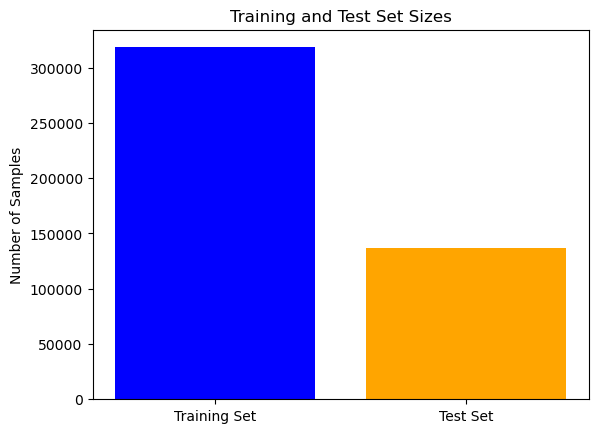

In [16]:
import matplotlib.pyplot as plt
# Plotting the shapes of training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

# Plotting the shapes of training and test sets
labels = ['Training Set', 'Test Set']
sizes = [train_df_shape[0], test_df_shape[0]]

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=['blue', 'orange'])
ax.set_ylabel('Number of Samples')
ax.set_title('Training and Test Set Sizes')

plt.show()

In [17]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.3 MB/s eta 0:00:00


Step 2. Train Different Models

In [19]:
!pip install mlflow

  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 146.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 181.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.0/681.0 kB 68.4 MB/s eta 0:00:00
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)


In [20]:
import os
import joblib
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Create a directory to save model artifacts
os.makedirs('model_artifacts', exist_ok=True)

# Start an MLflow run
with mlflow.start_run():
    # 1. Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    print("Random Forest AUC:", rf_auc)
    joblib.dump(rf_model, 'model_artifacts/rf_model.joblib')
    
    # Log the model and AUC score to MLflow
    mlflow.sklearn.log_model(rf_model, "rf_model")
    mlflow.log_metric("rf_auc", rf_auc)

    # 2. XGBoost
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    print("XGBoost AUC:", xgb_auc)
    joblib.dump(xgb_model, 'model_artifacts/xgb_model.joblib')
    
    # Log the model and AUC score to MLflow
    mlflow.sklearn.log_model(xgb_model, "xgb_model")
    mlflow.log_metric("xgb_auc", xgb_auc)

print("Models and metrics have been logged to MLflow.")


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Random Forest AUC: 0.9999996798858591


2025/03/26 10:32:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp8vdcpt2a/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/03/26 10:32:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:32:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost AUC: 0.9997004483335029


2025/03/26 10:32:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp_szzw0l6/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/03/26 10:32:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Models and metrics have been logged to MLflow.


In [3]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Create a directory to save model artifacts
os.makedirs('model_artifacts', exist_ok=True)

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("Random Forest AUC:", rf_auc)
joblib.dump(rf_model, 'model_artifacts/rf_model.joblib')

# 2. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("XGBoost AUC:", xgb_auc)
joblib.dump(xgb_model, 'model_artifacts/xgb_model.joblib')


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│    1 import os                                                                                   │
│    2 import joblib                                                                               │
│    3 from sklearn.ensemble import RandomForestClassifier                                         │
│ ❱  4 from xgboost import XGBClassifier                                                           │
│    5 from sklearn.metrics import roc_auc_score                                                   │
│    6                                                                                             │
│    7 # Create a directory to save model artifacts                                                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'xgboost'

Step 3. Upload Model Artifacts to S3


In [21]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sagemaker.Session()
default_bucket = sagemaker_session.default_bucket()
model_prefix = "creditcard-fraud-models"

# Upload each model file to S3
rf_model_path = sagemaker_session.upload_data(path='model_artifacts/rf_model.joblib',
                                              key_prefix=model_prefix + "/rf")
xgb_model_path = sagemaker_session.upload_data(path='model_artifacts/xgb_model.joblib',
                                               key_prefix=model_prefix + "/xgb")


print("RF Model S3 path:", rf_model_path)
print("XGB Model S3 path:", xgb_model_path)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[03/26/25 10:33:46] INFO     Found credentials from IAM Role:                                   ]8;id=178788;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=890511;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[03/26/25 10:33:48] INFO     Found credentials from IAM Role:                                   ]8;id=631716;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=323747;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=482176;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=226978;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

RF Model S3 path: s3://sagemaker-ap-south-1-419622399030/creditcard-fraud-models/rf/rf_model.joblib
XGB Model S3 path: s3://sagemaker-ap-south-1-419622399030/creditcard-fraud-models/xgb/xgb_model.joblib


In [22]:
import tarfile

model_file = "model_artifacts/rf_model.joblib"

archive_file = "model_artifacts/rf_model.tar.gz"

with tarfile.open(archive_file, mode="w:gz") as archive:
    archive.add(model_file, arcname="model.joblib")


In [23]:
rf_model_archive_path = sagemaker_session.upload_data(
    path=archive_file,
    key_prefix=model_prefix + "/rf"
)
print("RF Model Archive S3 path:", rf_model_archive_path)


RF Model Archive S3 path: s3://sagemaker-ap-south-1-419622399030/creditcard-fraud-models/rf/rf_model.tar.gz


In [25]:
from sagemaker.sklearn.model import SKLearnModel

xgb_inference_model = SKLearnModel(model_data=rf_model_archive_path,
                                   role=role,
                                   entry_point='inference.py',
                                   framework_version='0.23-1',
                                   py_version='py3')

rf_endpoint_name = "rfendpoint"
rf_predictor = xgb_inference_model.deploy(initial_instance_count=1,
                                           instance_type="ml.t2.medium",
                                           endpoint_name=rf_endpoint_name)


[03/26/25 10:36:38] INFO     Found credentials from IAM Role:                                   ]8;id=599281;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=24735;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Creating model with name:                                              ]8;id=696120;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=295112;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\
                             sagemaker-scikit-learn-2025-03-26-10-36-38-685                                        

[03/26/25 10:36:39] INFO     Creating endpoint-config with name rfendpoint                          ]8;id=57718;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=50624;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5937\5937]8;;\

                    INFO     Creating endpoint with name rfendpoint                                 ]8;id=495126;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=294512;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4759\4759]8;;\

--------------------------------------------------*

[03/26/25 11:02:14] ERROR    Please check the troubleshooting guide for common errors:              ]8;id=25788;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=388372;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4782\4782]8;;\
                             https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-python-sdk-t                
                             roubleshooting.html#sagemaker-python-sdk-troubleshooting-create-endpoi                
                             nt                                                                                    

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:10                                                                                   │
│                                                                                                  │
│    7 │   │   │   │   │   │   │   │      py_version='py3')                                        │
│    8                                                                                             │
│    9 rf_endpoint_name = "rfendpoint"                                                             │
│ ❱ 10 rf_predictor = xgb_inference_model.deploy(initial_instance_count=1,                         │
│   11 │   │   │   │   │   │   │   │   │   │      instance_type="ml.t2.medium",                    │
│   12 │   │   │   │   │   │   │   │   │   │      endpoint_name=rf_endpoint_name)                  │
│   13                                                                                             │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/model.py:1786 in    │
│ deploy                                                                                           │
│                                                                                                  │
│   1783 │   │   │   if is_explainer_enabled:                                                      │
│   1784 │   │   │   │   explainer_config_dict = explainer_config._to_request_dict()               │
│   1785 │   │   │                                                                                 │
│ ❱ 1786 │   │   │   self.sagemaker_session.endpoint_from_production_variants(                     │
│   1787 │   │   │   │   name=self.endpoint_name,                                                  │
│   1788 │   │   │   │   production_variants=[production_variant],                                 │
│   1789 │   │   │   │   tags=tags,                                                                │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py:5940 in  │
│ endpoint_from_production_variants                                                                │
│                                                                                                  │
│   5937 │   │   logger.info("Creating endpoint-config with name %s", name)                        │
│   5938 │   │   self.sagemaker_client.create_endpoint_config(**config_options)                    │
│   5939 │   │                                                                                     │
│ ❱ 5940 │   │   return self.create_endpoint(                                                      │
│   5941 │   │   │   endpoint_name=name,                                                           │
│   5942 │   │   │   config_name=name,                                                             │
│   5943 │   │   │   tags=endpoint_tags,                                                           │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py:4785 in  │
│ create_endpoint                                                                                  │
│                                                                                                  │
│   4782 │   │   │   logger.error(                                                                 │
│   4783 │   │   │   │   "Please check the troubleshooting guide for common errors: %s", troubles  │
│   4784 │   │   │   )                                                                             │
│ ❱ 4785 │   │   │   raise e                                 

In [ ]:
import tarfile

# Path to the saved XGBoost model
model_file = "model_artifacts/xgb_model.json"

archive_file = "model_artifacts/xgb_model.tar.gz"

with tarfile.open(archive_file, mode="w:gz") as archive:
    archive.add(model_file, arcname="xgboost-model")


In [ ]:
import sagemaker

sagemaker_session = sagemaker.Session()

model_prefix = "creditcard-fraud-models/xgb"

# Upload model to S3
xgb_model_archive_path = sagemaker_session.upload_data(
    path=archive_file,
    key_prefix=model_prefix
)

print("XGBoost Model Archive S3 path:", xgb_model_archive_path)


In [ ]:
from sagemaker.xgboost.model import XGBoostModel

# Create an XGBoost model object
xgb_inference_model = XGBoostModel(model_data=xgb_model_archive_path,
                                   role=role,
                                   entry_point='inference.py',  # Ensure you have this script
                                   framework_version="1.3-1",
                                   py_version="py3")

# Define a free-tier instance type (ml.t2.medium)
xgb_endpoint_name = "xgb-cc-fraud-endpoint"
xgb_predictor = xgb_inference_model.deploy(initial_instance_count=1,
                                           instance_type="ml.t2.medium",
                                           endpoint_name=xgb_endpoint_name)

print(f"XGBoost model deployed at endpoint: {xgb_endpoint_name}")


#Deploy Models for Batch Inference

In [ ]:
batch_input_path = sagemaker_session.upload_data(path="batch_test.csv",
                                                 key_prefix="batch_inference_input")
# Save X_test (without target) as CSV
X_test.to_csv("batch_test.csv", index=False)
print("Batch input data S3 path:", batch_input_path)


In [28]:
!pip freeze > requirements.txt